# How Covid 19 spread and affect different populations


# Story background
source:https://www.otandp.com/zh-hk/%E6%96%B0%E5%9E%8B%E5%86%A0%E7%8B%80%E7%97%85%E6%AF%92%E7%97%85%E6%99%82%E9%96%93%E8%BB%B8

2019
December 30
Li Wenliang[1], a 34-year-old ophthalmologist from Wuhan In late December, he posted a message in his WeChat classmates' group alerting them to information about a new virus.
2020
22 January
A WHO China field mission to Wuhan issued a statement saying that there was evidence of human-to-human transmission in Wuhan, but that further investigation was needed to understand the full extent of transmission. [3]
The first positive case was also recorded in Hong Kong. A 39-year-old man arrived in Hong Kong from China.

source:https://zh.wikipedia.org/wiki/2019%E5%86%A0%E7%8B%80%E7%97%85%E6%AF%92%E7%97%85%E9%A6%99%E6%B8%AF%E7%96%AB%E6%83%85
The Severe Specific Infectious Pneumonia (SSP) outbreak in Hong Kong is part of the SSP pandemic. On 23 January 2020, the Centre for Health Protection (CHP) officially announced the confirmation of a male visitor from Mainland China who arrived in Hong Kong on 21 January from Wuhan and transferred to the Guangzhou-Shenzhen-Hong Kong Express Rail Link at Shenzhen North Station. However, the epidemic resumed after New Year's Day in 2022, when the highly infectious Omicron mutated virus subtype BA.2 spread rapidly from quarantine hotels to the community in January 2022[10]. The fifth wave of the epidemic peaked on 3 March, with 76,991 positive cases tested by rapid antigen testing and nucleic acid testing in a single day, with a gradual decline in the number of positive cases in a single day in mid-March [11]. Studies by the Li Ka Shing Faculty of Medicine of the University of Hong Kong have shown that at least 3.58 million people have actually been infected in the fifth wave of the epidemic in Hong Kong[12] , and with more than 80% of the population having received at least two doses of vaccine, herd immunity has emerged in Hong Kong[13] . Unless a new variant of the virus emerges, the chances of another outbreak like the fifth wave in the coming year are slim[15].

# Task 1 - Analysis Covid-19 in worldwide

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('covid_worldwide.csv')


In [3]:
df.head()


,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [4]:
df.columns


Index(['Serial Number', 'Country', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Total Test', 'Population'],
      dtype='object')

In [5]:
df.describe()


,Serial Number
count,231.000000
mean,116.000000
std,66.828138
min,1.000000
25%,58.500000
50%,116.000000
75%,173.500000
max,231.000000


In [11]:

df['Total Cases'] = df['Total Cases'].str.replace(',', '')


df['Total Cases'] = df['Total Cases'].astype(int)


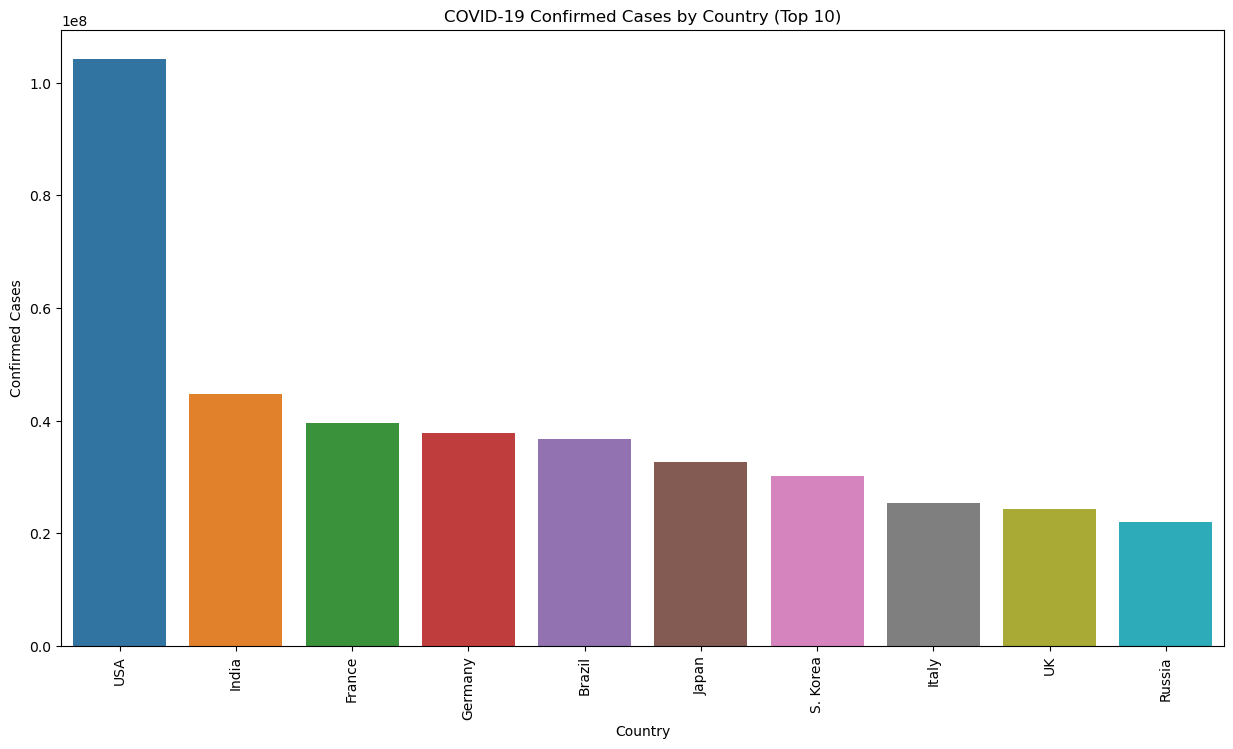

In [25]:
top_10 = df.sort_values(by='Total Cases', ascending=False).head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x='Country', y='Total Cases', data=top_10, estimator=sum)
plt.xticks(rotation=90)
plt.title('COVID-19 Confirmed Cases by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = df.dropna() 
X = df[['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases',  'Population']]
y = df['Total Cases']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.3f}')
print(f'R^2: {r2:.3f}')


RMSE: 0.000
R^2: 1.000


RMSE and R^2 are indicators for evaluating the performance of a regression model.

RMSE stands for Root Mean Squared Error, which is the square root of the average of the squares of the difference between the actual value and the predicted value. In other words, the larger the difference between the predicted value and the actual value, the larger the RMSE, and the smaller the difference between the predicted value and the actual value, the smaller the RMSE. The smaller the RMSE, the better the performance of the model. If the RMSE is 0.000, it means that the model's predicted value and the actual value agree perfectly.

R^2 is also called the Coefficient of Determination, and is an indicator of how well the value predicted by the model matches the actual value. The R^2 value ranges from 0 to 1, the closer to 1 the better the model describes the data. If R^2 is 1.000, it means that the model describes the data perfectly. However, there is a possibility that the model is overfitting the data, so it should be evaluated comprehensively with other evaluation metrics.

In [46]:
print(df.isna().sum())


Serial Number       0
Total Cases         0
Total Deaths        6
Total Recovered    21
Total Test         18
Population          3
dtype: int64


In [47]:
df.fillna(df.mean(), inplace=True)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Total Cases', 'Total Deaths', 'Total Recovered','Total Test', 'Population']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


/var/folders/lv/7610qpn914q0338lz1vcxgfr0000gn/T/ipykernel_86289/389447783.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


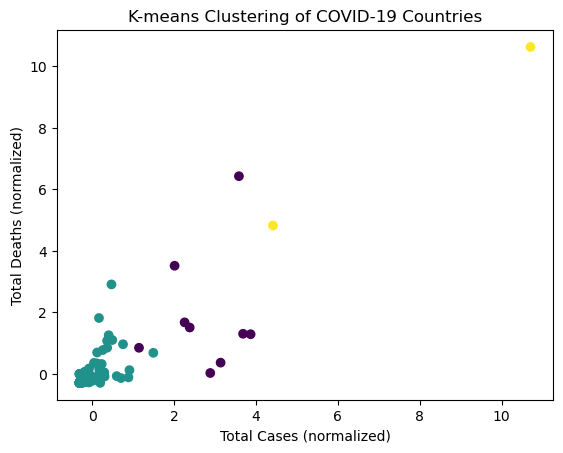

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('covid_worldwide.csv')

df['Total Cases'] = df['Total Cases'].str.replace(',', '').astype(float)
df['Total Deaths'] = df['Total Deaths'].str.replace(',', '').astype(float)
df['Total Recovered'] = df['Total Recovered'].str.replace(',', '').astype(float)
df['Active Cases'] = df['Active Cases'].str.replace(',', '').astype(float)
df['Total Test'] = df['Total Test'].str.replace(',', '').astype(float)
df['Population'] = df['Population'].str.replace(',', '').astype(float)

df.fillna(df.mean(), inplace=True)

scaler = StandardScaler()
numeric_cols = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test', 'Population']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df[numeric_cols])

plt.scatter(df['Total Cases'], df['Total Deaths'], c=clusters, cmap='viridis')
plt.xlabel('Total Cases (normalized)')
plt.ylabel('Total Deaths (normalized)')
plt.title('K-means Clustering of COVID-19 Countries')
plt.show()


# Task 2 - Identify the correlation of GDP and number of cases

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('dataset/owid-covid-data.csv')

In [7]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302664 entries, 0 to 302663
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    302664 non-null  object 
 1   continent                                   288277 non-null  object 
 2   location                                    302664 non-null  object 
 3   date                                        302664 non-null  object 
 4   total_cases                                 266771 non-null  float64
 5   new_cases                                   294064 non-null  float64
 6   new_cases_smoothed                          292800 non-null  float64
 7   total_deaths                                246214 non-null  float64
 8   new_deaths                                  294139 non-null  float64
 9   new_deaths_smoothed                         292909 non-null  float64
 

In [9]:
df = df.loc[:, ['gdp_per_capita', 'location', 'total_cases']]
df = df.sample(frac = 1)
df = df.drop(df[df['location'] == 'World'].index)
df = df.drop_duplicates(subset=['location'])
df = df.dropna()

In [10]:
df.head()

,gdp_per_capita,location,total_cases
53307,15308.712,China,125565.0
178537,7485.013,Morocco,1124986.0
205725,13240.405,Palau,5460.0
24016,17167.967,Belarus,76.0
300515,3689.251,Zambia,12381.0


In [11]:
df.isnull().sum()

gdp_per_capita    0
location          0
total_cases       0
dtype: int64

In [12]:
from sklearn.preprocessing import MinMaxScaler

df1 = df[['gdp_per_capita', 'total_cases']]
df1.head()

,gdp_per_capita,total_cases
53307,15308.712,125565.0
178537,7485.013,1124986.0
205725,13240.405,5460.0
24016,17167.967,76.0
300515,3689.251,12381.0


In [13]:
scaler = MinMaxScaler()
df1_normalized = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

### Data Visualization

In [14]:
from IPython.display import Image
img = 'tableau_task2.png'
Image(url=img)

### Data Modeling

In [15]:
from sklearn.linear_model import LinearRegression

Regression model slope:     [34.24361259]
Regression model intercept: 980289.9974273739


/var/folders/y7/w5jvctms1cj6hxymq1tzq5l40000gn/T/ipykernel_69705/3081198468.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(X[:, np.newaxis], y)


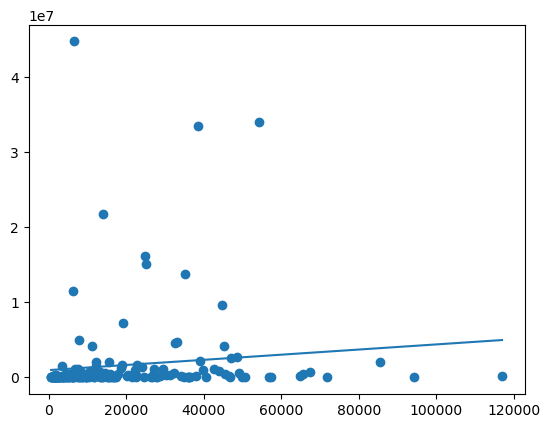

In [16]:
X = df1['gdp_per_capita']
y = df1['total_cases']

model = LinearRegression(fit_intercept=True)

model.fit(X[:, np.newaxis], y)

xfit = np.array([X.min(), X.max()])
yfit = model.predict(xfit[:, np.newaxis])

print("Regression model slope:    ", model.coef_)
print("Regression model intercept:", model.intercept_)
plt.scatter(X, y)
plt.plot(xfit, yfit)

# Task 3 - Identifying the relationship between Covid-19 and Districts, try to predict the pattern of cases in the districts


# Treat the data first for classification

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


     ---------------------------------------- 1.1/1.1 MB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 22.0/22.0 MB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 5.1/5.1 MB 8.1 MB/s eta 0:00:00


<AxesSubplot:>

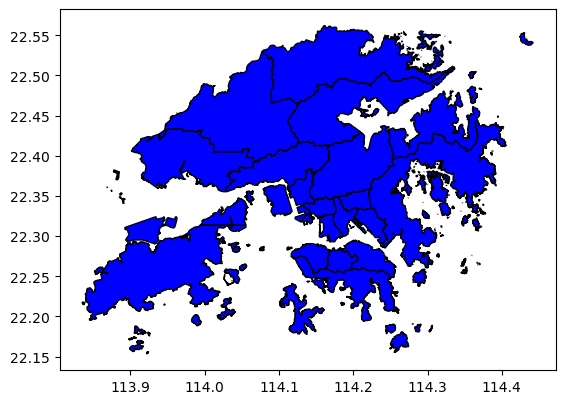

In [38]:
!pip install geopandas
import geopandas as geo
geop = geo.read_file('Hong_Kong_18_Districts.geojson')
geop.plot(color = 'blue', edgecolor = 'black')

In [49]:
df = geo.read_file('Building_of_Mandatory_Home_Quarantine_under_Cap_599C_in_Hong_Kong.geojson')
df

,OBJECTID,OBJECTID_1,DISTRICT_EN,DISTRICT_TC,BLDGNAME_EN,BLDGNAME_TC,END_DATE,EASTING,NORTHING,UPDATE_DATE,geometry
0,1,62718,North,北區,NO.3 KA FU CLOSE,嘉富坊3號,2020-03-21,830684,840878,2020-03-14,POINT Z (114.12260 22.50753 0.00000)
1,2,62720,North,北區,"BLOCK 1, VIENNA GARDEN",維也納花園1座,2020-03-21,831478,839589,2020-03-14,POINT Z (114.13032 22.49589 0.00000)
2,3,62721,North,北區,LOK FUNG BUILDING,樂豐樓,2020-03-21,832770,839959,2020-03-14,POINT Z (114.14288 22.49924 0.00000)
3,4,62722,North,北區,NO.10 LUNG SUM AVENUE,龍琛路10號,2020-03-21,831427,840466,2020-03-14,POINT Z (114.12983 22.50381 0.00000)
4,5,62723,North,北區,LO WU STATION ROAD,羅湖道,2020-03-21,830194,842843,2020-03-14,POINT Z (114.11783 22.52528 0.00000)
...,...,...,...,...,...,...,...,...,...,...,...
92013,92014,76926,Shatin,沙田,"BLOCK E, MOSTOWN (PHASE 4), SUNSHINE CITY",新港城(4期)E座,2020-03-14,841990,831696,2020-03-15,POINT Z (114.23245 22.42461 0.00000)
92014,92015,77628,Sai Kung,西貢,"SHEUNG YAN HOUSE, SHEUNG TAK ESTATE",尚德邨尚仁樓,2020-03-10,844619,819154,2020-03-15,POINT Z (114.25792 22.31134 0.00000)
92015,92016,78260,Islands,離島,"GREENVALE VILLAGE, GREENERY COURT, DISCOVERY BAY",愉景灣頤峰靖山閣,2020-03-15,819109,818246,2020-03-15,POINT Z (114.01035 22.30308 0.00000)
92016,92017,79242,Eastern,東區,"BLOCK 1, ISLAND RESORT, NO.28 SIU SAI WAN ROAD",小西灣道28號藍灣半島1座,2020-03-14,843831,814200,2020-03-18,POINT Z (114.25025 22.26661 0.00000)


In [50]:
x = pd.DataFrame(gdf['geometry'].x, columns = ['x_coordinate'])

In [51]:
x

,x_coordinate
0,114.122603
1,114.130324
2,114.142879
3,114.129826
4,114.117833
...,...
92013,114.232454
92014,114.257924
92015,114.010349
92016,114.250253


In [52]:
x['y_coordinate'] =  df['geometry'].y

In [53]:
x

,x_coordinate,y_coordinate
0,114.122603,22.507532
1,114.130324,22.495894
2,114.142879,22.499239
3,114.129826,22.503814
4,114.117833,22.525275
...,...,...
92013,114.232454,22.424614
92014,114.257924,22.311343
92015,114.010349,22.303078
92016,114.250253,22.266609


K-means clustering would first be done to know the clustering of cases in the areas of Hong Kong

[4 4 4 ... 0 3 0]


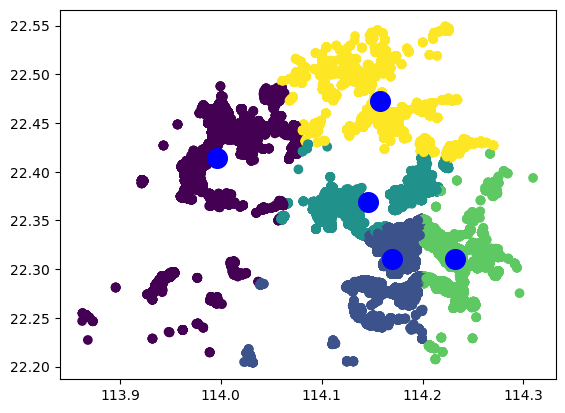

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(x)
k_means = kmeans.predict(x)
print(k_means)
plt.scatter(x['x_coordinate'], x['y_coordinate'], c=k_means)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200)

<AxesSubplot:>

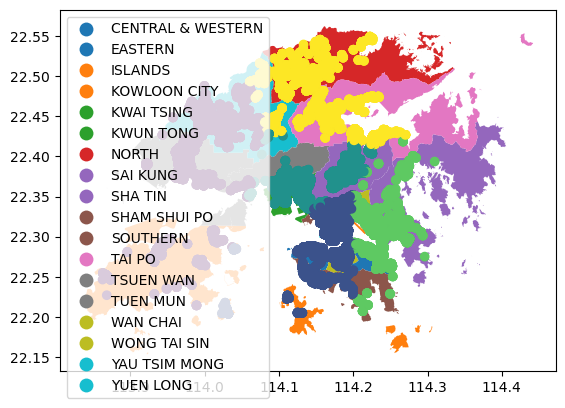

In [71]:
axes = geop.plot(column='ENAME',legend=True)
df['center'] = k_means
df.plot(ax=axes, column='center')

Treat the data for Multi-Layer Perceptron (MLP) classification

In [123]:
df['DISTRICT_EN'] = df['DISTRICT_EN'].replace(['Central & Western', 'Eastern','Islands','Kowloon City', 'Kwai Tsing','Kwun Tong','North', 'Sai Kung', 'Shatin', 'Sham Shui Po', 'Southern', 'Tai Po', 'Tsuen Wan', 'Tuen Mun', 'Wan Chai', 'Wong Tai Sin', 'Yau Tsim Mong', 'Yuen Long'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
df['DISTRICT_EN'] = df['DISTRICT_EN'].astype(int)

In [124]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92018 entries, 0 to 92017
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OBJECTID     92018 non-null  int64   
 1   OBJECTID_1   92018 non-null  int64   
 2   DISTRICT_EN  92018 non-null  int32   
 3   DISTRICT_TC  92018 non-null  object  
 4   BLDGNAME_EN  92018 non-null  object  
 5   BLDGNAME_TC  92018 non-null  object  
 6   END_DATE     92018 non-null  object  
 7   EASTING      92018 non-null  int64   
 8   NORTHING     92018 non-null  int64   
 9   UPDATE_DATE  92018 non-null  object  
 10  geometry     92018 non-null  geometry
 11  center       92018 non-null  int32   
 12  District     92018 non-null  object  
dtypes: geometry(1), int32(2), int64(4), object(6)
memory usage: 8.4+ MB


In [125]:
x['location'] = df['DISTRICT_EN']

In [141]:
x

,x_coordinate,y_coordinate,center,location
0,114.122603,22.507532,4,6
1,114.130324,22.495894,4,6
2,114.142879,22.499239,4,6
3,114.129826,22.503814,4,6
4,114.117833,22.525275,4,6
...,...,...,...,...
92013,114.232454,22.424614,4,8
92014,114.257924,22.311343,1,7
92015,114.010349,22.303078,0,2
92016,114.250253,22.266609,1,1


Undergo the MLP Classification

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

x = x.dropna()

# Step 3: Normalize or scale the features, if necessary
# It's a good practice to scale the input features for MLP classifiers
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x.drop('location', axis=1))

# Prepare the data for classification
X = pd.DataFrame(X_scaled, columns=x.drop('location', axis=1).columns)
y = x['location']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

# Step 6: Make predictions on the test set
predictions = mlp.predict(X_test)

cm = confusion_matrix(y_test, predictions)

# Calculate TN, FP, FN, TP, recall (sensitivity), specificity, and precision for each class
for i in range(len(cm)):
    tp = cm[i, i]
    fp = np.sum(cm[:, i]) - tp
    fn = np.sum(cm[i, :]) - tp
    tn = np.sum(cm) - tp - fp - fn
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)

    print(f'\nDistrict{i + 1}:')
    print('============')
    print(f'TN={tn}, FP={fp}, FN={fn}, TP={tp}')
    print(f'Recall/Sensitivity={round(recall, 3)}')
    print(f'Specificity={round(specificity, 3)}')
    print(f'Precision={round(precision, 3)}')


District1:
TN=17662, FP=3, FN=6, TP=733
Recall/Sensitivity=0.992
Specificity=1.0
Precision=0.996

District2:
TN=17479, FP=12, FN=5, TP=908
Recall/Sensitivity=0.995
Specificity=0.999
Precision=0.987

District3:
TN=18095, FP=0, FN=0, TP=309
Recall/Sensitivity=1.0
Specificity=1.0
Precision=1.0

District4:
TN=17128, FP=94, FN=87, TP=1095
Recall/Sensitivity=0.926
Specificity=0.995
Precision=0.921

District5:
TN=17350, FP=40, FN=37, TP=977
Recall/Sensitivity=0.964
Specificity=0.998
Precision=0.961

District6:
TN=16884, FP=37, FN=37, TP=1446
Recall/Sensitivity=0.975
Specificity=0.998
Precision=0.975

District7:
TN=17308, FP=4, FN=2, TP=1090
Recall/Sensitivity=0.998
Specificity=1.0
Precision=0.996

District8:
TN=17563, FP=1, FN=3, TP=837
Recall/Sensitivity=0.996
Specificity=1.0
Precision=0.999

District9:
TN=16956, FP=12, FN=0, TP=1436
Recall/Sensitivity=1.0
Specificity=0.999
Precision=0.992

District10:
TN=16763, FP=13, FN=34, TP=1594
Recall/Sensitivity=0.979
Specificity=0.999
Precision=0.99

# Task 4 - Classify different features and case status to see which feature is the factor of Covid-19 confirmed cases in Hong Kong.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('enhanced_sur_covid_19_eng.csv')

In [8]:
df.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [9]:
df.shape

(15441, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15441 entries, 0 to 15440
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Case no.                          15441 non-null  int64  
 1   Report date                       15441 non-null  object 
 2   Date of onset                     15421 non-null  object 
 3   Gender                            15435 non-null  object 
 4   Age                               15435 non-null  object 
 5   Name of hospital admitted         0 non-null      float64
 6   Hospitalised/Discharged/Deceased  15435 non-null  object 
 7   HK/Non-HK resident                15435 non-null  object 
 8   Classification*                   15435 non-null  object 
 9   Case status*                      15441 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


### Data Preprocessing

In [11]:
df = df.rename(columns={'Classification*': 'Classification', 'Case status*': 'Case status', 'Date of onset': 'Symptom'})


In [12]:
df = df.drop('Name of hospital admitted', axis = 1)
df = df.drop('Case no.', axis = 1)
df = df.dropna()

In [13]:
for i in df['Symptom']:
    if i != 'Asymptomatic':
        df['Symptom'] = df['Symptom'].replace(i, 'Symptomatic')

print(df["Symptom"].value_counts())

Symptomatic     10621
Asymptomatic     4800
Name: Symptom, dtype: int64


In [14]:
df.head()

,Report date,Symptom,Gender,Age,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification,Case status
0,23/01/2020,Symptomatic,M,39,Discharged,Non-HK resident,Imported case,Confirmed
1,23/01/2020,Symptomatic,M,56,Discharged,HK resident,Imported case,Confirmed
2,24/01/2020,Symptomatic,F,62,Discharged,Non-HK resident,Imported case,Confirmed
3,24/01/2020,Symptomatic,F,62,Discharged,Non-HK resident,Imported case,Confirmed
4,24/01/2020,Symptomatic,M,63,Discharged,Non-HK resident,Imported case,Confirmed


In [15]:
df.isnull().sum()

Report date                         0
Symptom                             0
Gender                              0
Age                                 0
Hospitalised/Discharged/Deceased    0
HK/Non-HK resident                  0
Classification                      0
Case status                         0
dtype: int64

In [16]:
df1 = df
df1 = df1.drop(df1[df1['Case status'] != 'Confirmed'].index)
df1 = df1.drop(df1[df1['Age'] == '<1'].index)
df1 = df1.drop(df1[df1['Age'] == 'Pending'].index)
df1['Age'] = df1['Age'].astype(int)

### Data Visualization

Text(0.5, 1.0, 'Type of confirmed cases')

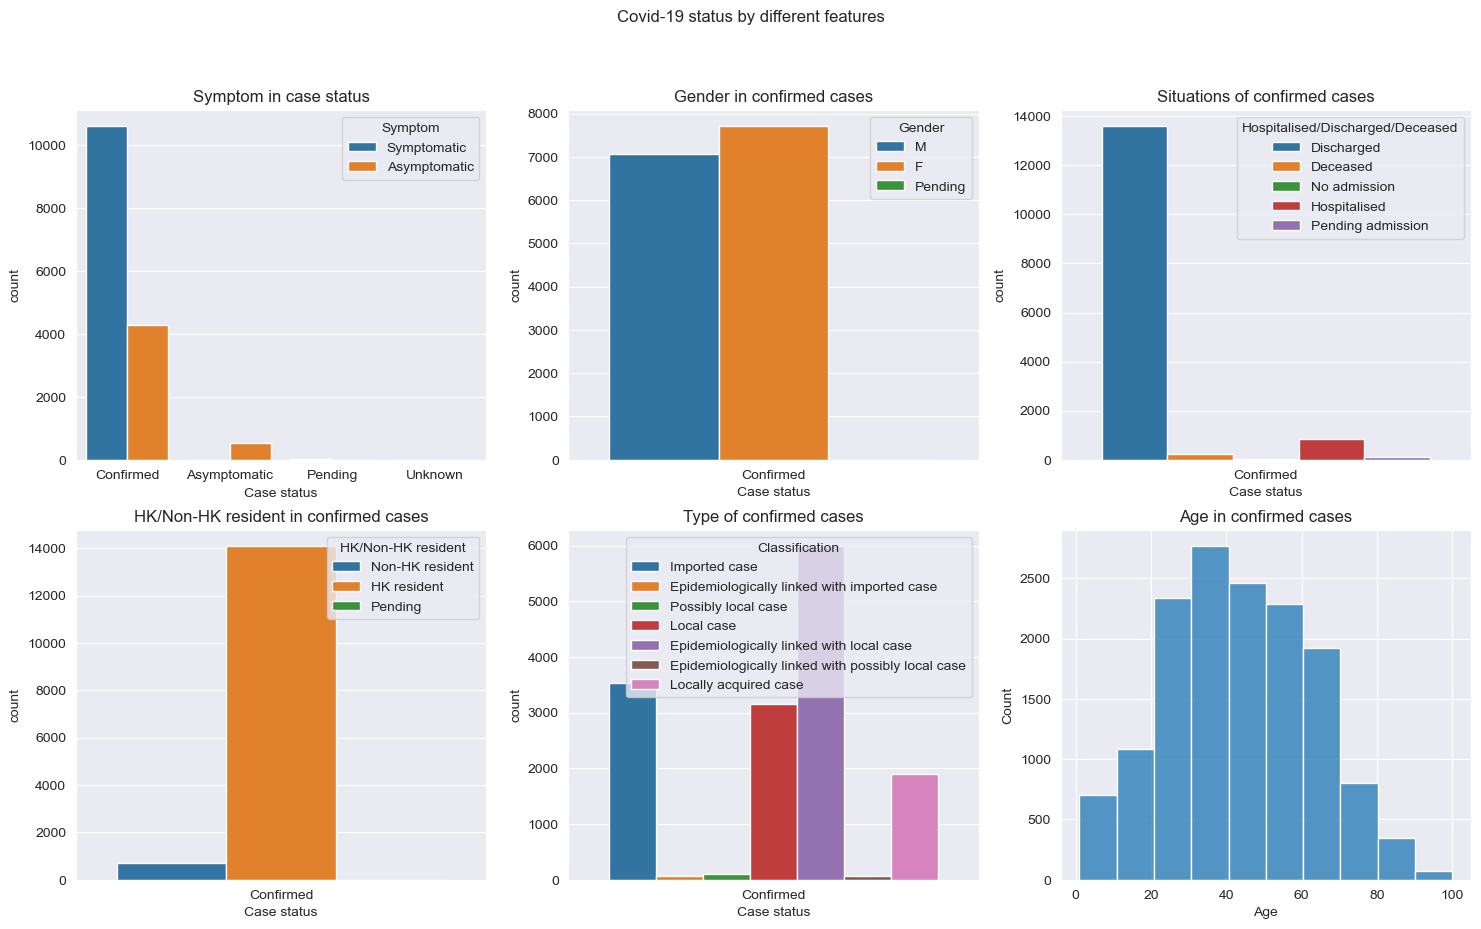

In [21]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Covid-19 status by different features')

sns.countplot(ax=axes[0, 0], data=df, x="Case status", hue="Symptom").set_title('Symptom in case status')
sns.countplot(ax=axes[0, 1], data=df1, x="Case status", hue="Gender").set_title('Gender in confirmed cases')
sns.histplot(df1['Age'], bins=10).set_title('Age in confirmed cases')
sns.countplot(ax=axes[0, 2], data=df1, x="Case status", hue="Hospitalised/Discharged/Deceased").set_title('Situations of confirmed cases')
sns.countplot(ax=axes[1, 0], data=df1, x="Case status", hue="HK/Non-HK resident").set_title('HK/Non-HK resident in confirmed cases')
sns.countplot(ax=axes[1, 1], data=df1, x="Case status", hue="Classification").set_title('Type of confirmed cases')

### Data Modeling

In [22]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [23]:
df['Symptom'] = LE.fit_transform(df['Symptom'])
df['Gender'] = LE.fit_transform(df['Gender'])
df['Age'] = LE.fit_transform(df['Age'])
df['Hospitalised/Discharged/Deceased'] = LE.fit_transform(df['Hospitalised/Discharged/Deceased'])
df['HK/Non-HK resident'] = LE.fit_transform(df['HK/Non-HK resident'])
df['Classification'] = LE.fit_transform(df['Classification'])

In [24]:
df = df.drop(df[df['Case status'] == 'Pending'].index)
df = df.drop(df[df['Case status'] == 'Unknown'].index)
df['Case status'] = df['Case status'].replace('Confirmed', 0)
df['Case status'] = df['Case status'].replace('Asymptomatic', 1)
df['Case status']=LE.fit_transform(df['Case status'])

In [25]:
df = df.sample(frac = 1)
df.head()

,Report date,Symptom,Gender,Age,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification,Case status
5698,23/11/2020,0,0,62,1,0,1,0
663,30/03/2020,0,0,9,1,0,3,0
14373,02/02/2022,0,1,62,2,0,5,1
4035,09/08/2020,1,0,9,1,0,4,0
2365,24/07/2020,0,1,56,1,0,1,0


In [26]:
from sklearn.model_selection import train_test_split

x = df.drop(['Report date', 'Case status', 'Hospitalised/Discharged/Deceased'], axis = 1)
y = df['Case status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

pred_KNN = KNN.predict(x_test)
print(classification_report(y_test, pred_KNN))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2987
           1       0.70      0.38      0.49        93

    accuracy                           0.98      3080
   macro avg       0.84      0.69      0.74      3080
weighted avg       0.97      0.98      0.97      3080



In [29]:
cf_matrix_KNN = confusion_matrix(y_test, pred_KNN)
print(cf_matrix_KNN)

[[2972   15]
 [  58   35]]


<Axes: >

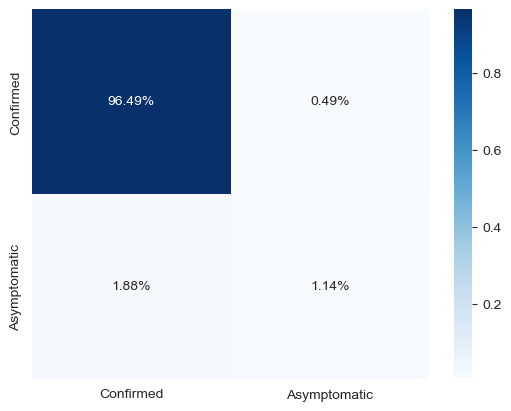

In [30]:
x_label = ['Confirmed', 'Asymptomatic']
y_label = ['Confirmed', 'Asymptomatic']

sns.heatmap(cf_matrix_KNN/np.sum(cf_matrix_KNN), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=x_label, yticklabels=y_label)

# Task 5 - Analyzes whether covid 19-derived symptoms are affected by age/sex 

# Extract from 1 January 2021 to current 31 December 2021 1YEARS DATA

In [2]:
#Select 01/01/2021 to 31/12/2021

In [3]:
#Latest local situation of COVID-19 

# Import module

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Import data,
# df = 2019 Local update on coronavirus disease
# df_build = List of buildings with positive tests for SARS Coronavirus 2 in the past 7 days

In [5]:
df = pd.read_csv(r"20211231-0922-enhanced_sur_covid_19_eng.csv", header=0)

In [6]:
df

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56.0,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
...,...,...,...,...,...,...,...,...,...,...
12631,12632,30/12/2021,Asymptomatic,M,46.0,NaN,To be provided,HK resident,Imported case,Confirmed
12632,12633,30/12/2021,Asymptomatic,M,32.0,NaN,To be provided,Non-HK resident,Imported case,Confirmed
12633,12634,30/12/2021,Asymptomatic,F,61.0,NaN,To be provided,HK resident,Imported case,Confirmed
12634,12635,30/12/2021,Asymptomatic,F,26.0,NaN,To be provided,HK resident,Imported case,Confirmed


In [7]:
df_build = pd.read_csv(r"20211231-0921-building_list_chi.csv")

In [8]:
df.to_excel('df.xlsx', index=False)

In [9]:
df_build.to_excel('df_build.xlsx', index=False)


# Analyse are the symptoms related to age/gender
# 1. symptom vs gender. 
# 2. symptoms vs age. 
# 3. symptoms vs gender age






**DATA CLEANING**

In [10]:
df.drop(['Name of hospital admitted'], axis=1, inplace=True)
df['Date of onset'] = df['Date of onset'].fillna('')
df.loc[df['Date of onset'].str.contains('\d+/\d+/\d+'), 'Date of onset'] = 'symptoms'

In [11]:
df.rename(columns={'Date of onset': 'symptoms?'}, inplace=True)
df.dropna(subset=['Gender'], inplace=True)

In [12]:
# data cleaning
df.drop(['Case no.', 'Hospitalised/Discharged/Deceased', 'HK/Non-HK resident', 'Confirmed/probable','Case classification*','Report date'], axis=1, inplace=True)

In [13]:
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df['symptoms?'] = df['symptoms?'].map({'Asymptomatic': 0, 'symptoms': 1})
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [14]:
data_cleaned = df.dropna()

In [15]:
df = data_cleaned

In [16]:
df['Age'].unique()

array([ 39.,  56.,  62.,  63.,  47.,  68.,  64.,  73.,  72.,  37.,  75.,
        80.,  60.,  25.,  28.,  55.,  65.,  58.,  42.,  24.,  70.,  91.,
        57.,  22.,  50.,  51.,  23.,  69.,  86.,  52.,  59.,  71.,  66.,
        43.,  67.,  41.,  61.,  54.,  45.,  46.,  32.,  83.,  38.,  48.,
        96.,  76.,  35.,  33.,  49.,  21.,  16.,  29.,  26.,  89.,  79.,
        84.,  44.,  36.,  31.,   1.,  30.,  18.,  27.,  34.,  20.,  12.,
        19.,  40.,   4.,  13.,  17.,  15.,  11.,  74.,  78.,   7.,  14.,
        77.,  53.,   0.,   2.,  93.,   6.,   3.,   8.,   5.,  10.,   9.,
        85.,  92.,  95.,  87.,  90.,  94.,  82.,  88.,  81.,  97., 100.,
        98.])

In [17]:
df['symptoms?'].unique()

array([1., 0.])

In [18]:
df['Gender'].unique()

array([1, 0])

**Algorithm**

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['symptoms?'])
y = df['symptoms?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("LogisticRegression:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

LogisticRegression:
[[  11 1411]
 [  16 2718]]
              precision    recall  f1-score   support

         0.0       0.41      0.01      0.02      1422
         1.0       0.66      0.99      0.79      2734

    accuracy                           0.66      4156
   macro avg       0.53      0.50      0.40      4156
weighted avg       0.57      0.66      0.53      4156



In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# RF
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# K
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# GB
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("SVM:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

print("KNN:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

print("Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Random Forest:
[[  82 1340]
 [  92 2642]]
              precision    recall  f1-score   support

         0.0       0.47      0.06      0.10      1422
         1.0       0.66      0.97      0.79      2734

    accuracy                           0.66      4156
   macro avg       0.57      0.51      0.44      4156
weighted avg       0.60      0.66      0.55      4156

SVM:
[[   0 1422]
 [   0 2734]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1422
         1.0       0.66      1.00      0.79      2734

    accuracy                           0.66      4156
   macro avg       0.33      0.50      0.40      4156
weighted avg       0.43      0.66      0.52      4156

KNN:
[[ 266 1156]
 [ 439 2295]]
              precision    recall  f1-score   support

         0.0       0.38      0.19      0.25      1422
         1.0       0.67      0.84      0.74      2734

    accuracy                           0.62      4156
   macro avg       0.5

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Correlation

In [22]:
# CORRELATION OF Asymptomatic?        Gender       Age
correlation_matrix = df.corr()

print(correlation_matrix)

           symptoms?    Gender       Age
symptoms?   1.000000 -0.001524  0.142399
Gender     -0.001524  1.000000 -0.014183
Age         0.142399 -0.014183  1.000000


In [23]:
df['Gender+Age'] = df['Gender'] + df['Age']

<ipython-input-23-0ec1c07d63c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender+Age'] = df['Gender'] + df['Age']


In [24]:
# CORRELATION OF Asymptomatic?        Gender        Age          Gender and Age 
correlation_matrix = df.corr()

print(correlation_matrix)

            symptoms?    Gender       Age  Gender+Age
symptoms?    1.000000 -0.001524  0.142399    0.142366
Gender      -0.001524  1.000000 -0.014183    0.011255
Age          0.142399 -0.014183  1.000000    0.999676
Gender+Age   0.142366  0.011255  0.999676    1.000000


**Summary**
: Older people may be slightly more likely to develop symptoms.